<img src="AV_Logo.png" style="width: 200px;height: 75px"/>

## Table of Contents

Missing Value Detection

* [What is a missing value?](#What-is-a-missing-value?)
* [But why do missing values occur?](#But-why-do-missing-values-occur?)
* [Impact of missing values](Impact-of-missing-values)
* [How to detect missing values?](How-to-detect-missing-values?)
* [Which are the methods to treat missing values?](Which-are-the-methods-to-treat-missing-values?)

Outlier detection

* [What is an Outlier?](What-is-Outlier?)
* [Why do outliers occur?](Why-do-outliers-occur?)
* [Impact of Outliers](Impact-of-Outliers)
* [How to detect Outliers?](How-to-detect-Outliers?)
* [How to deal with Outliers?](How-to-deal-with-Outliers?)

## What is a missing value?

Missing values are considered to be the first obstacle in predictive modeling. Hence, it’s important to master the methods to overcome them. For example, below image shows a dataset with missing values.

![image_missing](day4_2.png)

The image shown contains missing values which are represented in different forms. A few of the formats in which missing value  can occur are:

* Blank space
* "-"
* "?"
* "None"
* "NaN"
* "NA", etc

## But why do missing values occur?

Missing values can occur at two stages:

* **Data Extraction**: It is possible that there are problems with extraction process. In such cases, we should double-check for correct data with data guardians. Some hashing procedures can also be used to make sure data extraction is correct. Errors at data extraction stage are typically easy to find and can be corrected easily as well.


* **Data collection**: These errors occur at time of data collection and are harder to correct. They can be categorized in four types:
  * **Missing completely at random**: This is a case when the probability of missing variable is same for all observations. For example: respondents of data collection process decide that they will declare their earning after tossing a fair coin. If an head occurs, respondent declares his / her earnings & vice versa. Here each observation has equal chance of missing value.
  * **Missing at random**: This is a case when variable is missing at random and missing ratio varies for different values / level of other input variables. For example: While collecting data for age of both men and women. Women have higher missing value as compared to men.
  * **Missing that depends on unobserved predictors**: This is a case when the missing values are not random and are related to the unobserved input variable. For example: In a medical study, if a particular diagnostic causes discomfort, then there is higher chance of drop out from the study. This missing value is not at random unless we have included “discomfort” as an input variable for all patients.
  * **Missing that depends on the missing value itself**: This is a case when the probability of missing value is directly correlated with missing value itself. For example: People with higher or lower income are likely to provide non-response to their earning.

## Impact of missing values


Missing data in the training dataset can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.

![day4_1](day4_1.png)

Notice the missing values in the image shown above. In the left scenario, we have not treated missing values. The inference from this dataset is that the chances of men playing cricket is higher than women. On the other hand, if you look at the second table, which shows data after treatment of missing values (based on gender), we can see that women have higher chances of playing cricket compared to men.

## How to detect missing values?

In python, using pandas you can easily detect if there are missing values in the dataset. There's a "isnull" function of pandas, which does the job for you automatically. 

In [1]:
% pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [13]:
data.head()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
0,SD0001,GP,F,18,U,GT3,A,4,4,at_home,...,no,no,NaN,3,4,1,1,3,NaN,1
1,SD0002,GP,F,17,U,GT3,T,1,1,at_home,...,yes,no,NaN,3,3,1,1,3,NaN,1
2,SD0003,GP,F,15,U,LE3,T,1,1,at_home,...,yes,no,NaN,3,2,2,3,3,10.0,2
3,SD0004,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,3.0,2,2,1,1,5,2.0,3
4,SD0005,GP,F,16,U,GT3,T,3,3,other,...,no,no,4.0,3,2,1,2,5,4.0,2


In [14]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,278.000000,395.000000,395.000000,395.000000,395.000000,395.000000,337.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.949640,3.235443,3.108861,1.481013,2.291139,3.554430,5.866469,2.281013
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.885697,0.998862,1.113278,0.890741,1.287897,1.390303,8.406876,0.740091
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,2.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,2.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,3.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,3.000000


In [2]:
data = pd.read_csv('student.csv')

In [3]:
data.isnull()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"isnull" function highlights those values which are missing as True, separating missing values from non-empty ones.

To check the total count of missing values in each column, you can do as follows. 

In [4]:
data.isnull().sum()

ID              0
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities     84
nursery         0
higher          0
internet        0
romantic        0
famrel        117
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences       58
Grade           0
dtype: int64

## Which are the methods to treat missing values ?

There are two main methods for dealing with missing values:
1. Deletion
2. Imputation

### Deletion:  

Deletion is the easiest method to deal with missing values. Deletion methods are used when the nature of missing data is “Missing completely at random” else non random missing values can bias the model output.

One logical way of deletion is list wise deletion. In list wise deletion, we delete observations where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

In [5]:
result = data.dropna(how='any')

In [6]:
result.isnull().sum()

ID            0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
Grade         0
dtype: int64

In [7]:
print ('Before:', data.shape, 'After:', result.shape)

Before: (395, 32) After: (182, 32)


### Imputation: 

Imputation is a method to fill in the missing values with estimated ones. The objective is to employ known relationships that can be identified in the valid values of the dataset to assist in estimating the missing values. Mean / Mode / Median imputation is one of the most frequently used methods. It can be of two types:-
        
#### Imputation of continuous missing values

It consists of replacing the missing data for a given quantitative attribute by the mean or median of all known values of that variable.

In [8]:
# original distribution of missing values
data.absences.head()

0     NaN
1     NaN
2    10.0
3     2.0
4     4.0
Name: absences, dtype: float64

In [9]:
result = data['absences'].fillna(data.absences.mean())
result.head() # result after inputation

0     5.866469
1     5.866469
2    10.000000
3     2.000000
4     4.000000
Name: absences, dtype: float64

#### Imputation for categorical missing values

It consists of replacing the missing data for a given qualitative attribute by mode of all known values of that variable. 

In [5]:
data.activities.mode()[0]

'yes'

In [11]:
result = data.activities.fillna(data.activities.mode()[0])
result.head()

0     no
1     no
2     no
3    yes
4    yes
Name: activities, dtype: object

In [12]:
data.activities.head()

0     no
1     no
2     no
3    yes
4    NaN
Name: activities, dtype: object

There's also a third method for treating missing values; using predictive modeling. Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  Although we will not cover this method in the session, you can read more about it in [this article](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#two)

**Exercise**:

Q1. Impute missing values for column "famrel".

In [7]:
data.famrel.unique()

array([ nan,   3.,   4.,   5.,   1.,   2.])

In [12]:
data.famrel.head()

0    NaN
1    NaN
2    NaN
3    3.0
4    4.0
Name: famrel, dtype: float64

In [18]:
data.famrel.mode()[0]

4.0

In [19]:
impute=data.famrel.fillna(data.famrel.mode()[0])

In [20]:
impute.head()

0    4.0
1    4.0
2    4.0
3    3.0
4    4.0
Name: famrel, dtype: float64

Q2. Detect and treat missing values for another dataset. You have been provided a file "winequality.csv" for this purpose.

## What is Outlier?

Outlier is a commonly used terminology by analysts and data scientists as it needs close attention else it can result in major wrong estimations. To simplify it further, Outlier is an observation that appears far away and diverges from an overall pattern in a sample.

Let’s take an example, we do customer profiling and find out that the average annual income of customers is \$0.8 million. But, there are two customers having annual income of \$4 million and \$4.2 million. The annual income of these two customers is much higher than rest of the population. These two observations are considered as Outliers.

![day4_3](day4_3.png)

## Why do outliers occur?

Whenever we come across outliers, the ideal way to deal with them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence. Causes of outliers can be classified in two broad categories:

* Artificial (Error) / Non-natural
* Natural

Let’s understand various types of outliers in more detail:

#### Data Entry Errors
Human errors such as errors caused during data collection, recording, or entry can cause outliers in data. For example: Annual income of a customer is \$100000. Accidentally, the data entry operator puts an additional zero in the figure. Now the income becomes \$1000000 which is 10 times higher than the original income. Evidently, this will be the outlier value when compared with rest of the population.

#### Measurement Error
It is the most common source of outliers. This error will occur when the used measuring instrument turns out to be faulty. For example: There are 10 weighing machines. 9 of them weighing correctly where as 1 of the machine is faulty. Weight measured by people on the faulty machine will be higher / lower than the weight measured by rest of people in the group. The weights measured on faulty machine can lead to outliers.

#### Experimental Error
Another cause of outliers is experimental error. For example: In a 100m sprint involving 7 runners - A, B, C, D, E, F & G. Runner A missed out on the ‘Go’ call and started late. Hence, this caused the time taken by runner A more than the time taken by other runners. The total run time of runner A can be an outlier.

#### Intentional Outlier
This is commonly found in self-reported measures that involves sensitive data. For example: Teens are more likely to under report the amount of alcohol they have consumed. Only a fraction of them will reveal the actual quantity. Here the actual quantity might look like outliers because rest of the teens are under reporting the consumption.

#### Data Processing Error
Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.

#### Sampling error 
For instance, we have to measure the height of runners. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.

#### Natural Outlier
When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we treat this segment separately.

## Impact of Outliers

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the dataset:

* It increases the error variance and reduces the power of statistical tests
* If the outliers are non-randomly distributed, they can decrease normality
* They can bias or influence estimates that may be of substantive interest
* They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

To understand the impact deeply, let’s take an example to check what happens to a dataset with and without outliers.

Example:

![day4_4](day4_4.png)

As you can see, dataset with outliers has significantly different mean and standard deviation. In the first scenario, we will say that average is 5.45. But with the outlier, average soars to 30. This would change the estimate completely.

## How to detect Outliers?

Most commonly used method to detect outliers is visualization. We use various visualization methods, like Box-plot, Histogram, Scatter Plot (above, we have used box plot and scatter plot for visualization). 

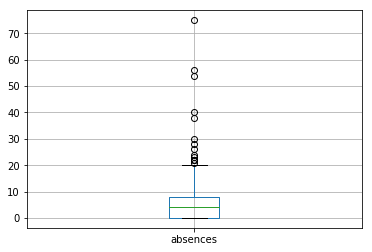

In [13]:
data.boxplot(column='absences')

The graph shows that there are some values in the data which exceed the usual values. This is shown by the black circles:

Some analysts use various thumb rules to detect outliers. Some of them are:

* Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR is considered as an outlier.
* Use capping methods. Any value out of the range of 5th and 95th percentile can be considered as an outlier
* Data points, three or more standard deviation away from mean are considered outlier
* Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding
* Bivariate and multivariate outliers are typically measured using either an index of influence or leverage, or distance. Popular indices such as Mahalanobis’ distance and Cook’s D are frequently used to detect outliers.

In [14]:
Q1 = data['absences'].quantile(0.25)
Q3 = data['absences'].quantile(0.75)

IQR = Q3 - Q1

In [15]:
data[data.absences > Q3 + 1.5*IQR]

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
74,SD0075,GP,F,16,U,GT3,T,3,3,other,...,yes,no,4.0,3,3,2,4,5,54.0,3
103,SD0104,GP,F,15,U,GT3,T,3,2,services,...,yes,no,4.0,3,5,1,1,2,26.0,1
183,SD0184,GP,F,17,U,LE3,T,3,3,other,...,yes,yes,5.0,3,3,2,3,1,56.0,2
198,SD0199,GP,F,17,U,GT3,T,4,4,services,...,yes,no,4.0,2,4,2,3,2,24.0,3
205,SD0206,GP,F,17,U,GT3,T,3,4,at_home,...,yes,yes,4.0,4,3,3,4,5,28.0,2
216,SD0217,GP,F,17,U,GT3,T,4,3,other,...,yes,yes,NaN,4,5,2,4,1,22.0,1
260,SD0261,GP,F,18,U,GT3,T,4,3,services,...,yes,yes,3.0,1,2,1,3,2,21.0,3
276,SD0277,GP,F,18,R,GT3,A,3,2,other,...,yes,yes,4.0,1,1,1,1,5,75.0,2
277,SD0278,GP,M,18,U,GT3,T,4,4,teacher,...,yes,no,3.0,2,4,1,4,3,22.0,2
280,SD0281,GP,M,17,U,LE3,A,4,1,services,...,yes,yes,NaN,5,4,2,4,5,30.0,2


Here we show how we can detect outliers in the data

## How to deal with Outliers?

Most of the ways to deal with outliers are similar to the methods of missing values like deleting observations, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

#### Deleting observations

We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers.

In [23]:
Q1 = data['absences'].quantile(0.25)
Q3 = data['absences'].quantile(0.75)
IQR = Q3 - Q1

#Values between Q1-1.5IQR and Q3+1.5IQR
filtered = data.query('(@Q1 - 1.5 * @IQR) <= absences <= (@Q3 + 1.5 * @IQR)')

data.shape, filtered.shape

((395, 32), (323, 32))

In [24]:
filtered.head()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
2,SD0003,GP,F,15,U,LE3,T,1,1,at_home,...,yes,no,NaN,3,2,2,3,3,10.0,2
3,SD0004,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,3.0,2,2,1,1,5,2.0,3
4,SD0005,GP,F,16,U,GT3,T,3,3,other,...,no,no,4.0,3,2,1,2,5,4.0,2
5,SD0006,GP,M,16,U,LE3,T,4,3,services,...,yes,no,5.0,4,2,1,2,5,10.0,3
6,SD0007,GP,M,16,U,LE3,T,2,2,other,...,yes,no,4.0,4,4,1,1,3,0.0,3


#### Transforming and binning values
Transforming variables can also eliminate outliers. Natural log of a value reduces the variation caused by extreme values. Binning is also a form of variable transformation. We can also use the process of assigning weights to different observations.

In [17]:
pd.cut(data.age, [0, 15, 20, 50], labels=['Young', 'Adolescent', 'Mature'])

0      Adolescent
1      Adolescent
2           Young
3           Young
4      Adolescent
5      Adolescent
6      Adolescent
7      Adolescent
8           Young
9           Young
10          Young
11          Young
12          Young
13          Young
14          Young
15     Adolescent
16     Adolescent
17     Adolescent
18     Adolescent
19     Adolescent
20          Young
21          Young
22     Adolescent
23     Adolescent
24          Young
25     Adolescent
26          Young
27          Young
28     Adolescent
29     Adolescent
          ...    
365    Adolescent
366    Adolescent
367    Adolescent
368    Adolescent
369    Adolescent
370    Adolescent
371    Adolescent
372    Adolescent
373    Adolescent
374    Adolescent
375    Adolescent
376    Adolescent
377    Adolescent
378    Adolescent
379    Adolescent
380    Adolescent
381    Adolescent
382    Adolescent
383    Adolescent
384    Adolescent
385    Adolescent
386    Adolescent
387    Adolescent
388    Adolescent
389    Ado

#### Imputing
Like [imputation of missing values](#Imputation:), we can also impute outliers. We can use mean, median & mode imputation methods. Before imputing values, we should analyse if it is a natural outlier or artificial. If it is artificial, we can go with imputing values. 

In [18]:
Q1 = data['absences'].quantile(0.25)
Q3 = data['absences'].quantile(0.75)
IQR = Q3 - Q1
mean_value = data.absences.mean()


lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

def imputer(value):
    if value < lower_limit or value > upper_limit:
        return mean_value
    else:
        return value

result = data.absences.apply(imputer)

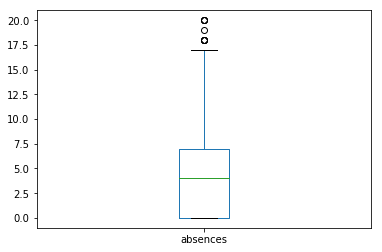

In [19]:
result.plot(kind='box')

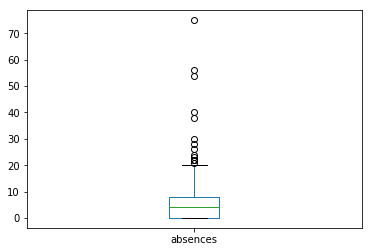

In [20]:
data.absences.plot(kind='box')

We can also use statistical model to predict values of outlier observation and after that we can impute it with predicted values.

If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups, build individual model for both groups and then combine the output. We will not be covering the approach in this session.

**Exercise**:

Q1. Draw a boxplot for rest of the columns to see if there are more outliers in the dataset

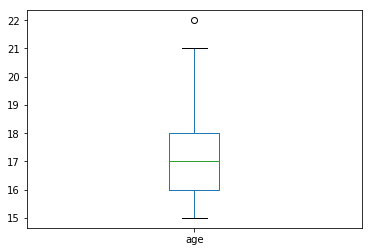

In [26]:
data.age.plot(kind='box')

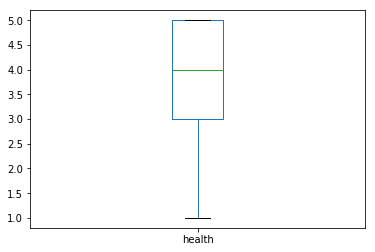

In [29]:

data.health.plot(kind='box')


Q2. Detect and treat outliers for another dataset. We have shared a file "winequality.csv" to let you practice at your end.

That's all for today!
----------------

-------------------------------
<img src="AV_Datafest_logo.png" style="width: 200px;height: 200px"/>
[www.analyticsvidhya.com](www.analyticsvidhya.com)

DATAFEST 2017